In [1]:
from pathlib import Path

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
path_to_results = Path(
    "~/Code/stereoid_public/stereoid_inputs_and_outputs/RESULTS/Scenarios/California/"
).expanduser()
path_to_nrcs = path_to_results / "nrcs_L1_All_obs_California_T01_T01_350_05.nc"

In [3]:
nrcs = xr.open_dataset(path_to_nrcs)

In [4]:
nrcs_db = 10 * np.log10(nrcs.nrcs)

In [5]:
np.percentile(nrcs_db.sel(sat="S1", pol="M"), 99.9)

68.46200505066055

In [6]:
nrcs

<xarray.Dataset>
Dimensions:    (az: 300, grg: 250, sat: 3, pol: 2)
Coordinates:
  * az         (az) float32 0.0 1e+03 2e+03 3e+03 ... 2.97e+05 2.98e+05 2.99e+05
  * grg        (grg) float32 3.416e+05 3.426e+05 ... 5.896e+05 5.906e+05
  * sat        (sat) <U2 'S1' 'HA' 'HB'
  * pol        (pol) <U1 'm' 'M'
Data variables:
    nrcs       (az, grg, sat, pol) float32 1.424e-05 0.03108 ... 0.009731
    longitude  (az, grg) float32 ...
    latitude   (az, grg) float32 ...
    inc        (grg, sat) float32 ...
    bist_ang   (grg, sat) float32 ...
Attributes: (12/16)
    created_time:            2023-11-21T13:40:14Z
    description:             L1 for Harmony project build using stereoid tools
    incident_angle:          29
    rx_ipc_name:             tud_2020_tripple_ati
    rx_cpc_name:             tud_2020_tripple
    mode:                    IWS
    ...                      ...
    lambda_min:              0.005
    lambda_max:              500
    n_k:                     128
    fetch:                   100000.0
    SAR_spectra_lambda_max:  2000
    SAR_spectra_looks:       25

In [7]:
np.percentile(nrcs_db.sel(sat="S1", pol="M"), 0.1)

-17.6280036277771

In [8]:
nrcs_db.sel(sat="S1", pol="M", grg=slice(nrcs_db.grg.min(), 360e3), az=slice(0, 150e3))

<xarray.DataArray 'nrcs' (az: 151, grg: 19)>
array([[-15.074957 , -15.14288  , -15.210677 , ..., -16.122965 ,
        -16.18563  , -16.247414 ],
       [-15.074957 , -15.14288  , -15.210677 , ..., -16.122965 ,
        -16.18563  , -16.247414 ],
       [-15.074957 , -15.14288  , -15.210677 , ..., -16.122965 ,
        -16.18563  , -16.247414 ],
       ...,
       [-15.074957 , -15.14288  , -15.210677 , ...,  -9.8979025,
        -10.333804 , -10.867502 ],
       [-15.074957 , -15.14288  , -15.210677 , ..., -10.196775 ,
        -10.616686 , -11.185514 ],
       [-15.074957 , -15.14288  , -15.210677 , ..., -10.120984 ,
        -10.636719 , -11.198769 ]], dtype=float32)
Coordinates:
  * az       (az) float32 0.0 1e+03 2e+03 3e+03 ... 1.48e+05 1.49e+05 1.5e+05
  * grg      (grg) float32 3.416e+05 3.426e+05 3.436e+05 ... 3.586e+05 3.596e+05
    sat      <U2 'S1'
    pol      <U1 'M'

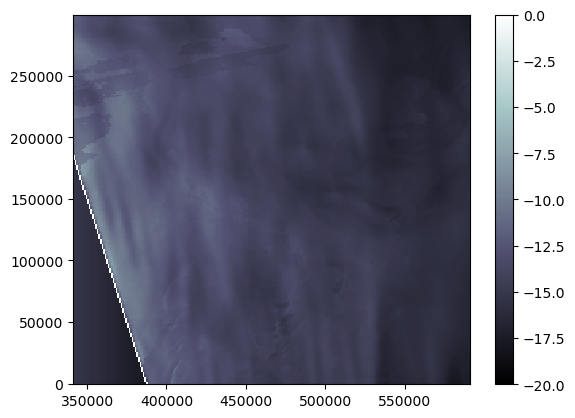

In [9]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(
    nrcs_db.grg,
    nrcs_db.az,
    nrcs_db.sel(sat="S1", pol="M"),
    vmin=-20,
    vmax=0,
    cmap="bone",
)
fig.colorbar(pcm, ax=ax)

In [54]:
nrcs_db_nan = nrcs_db.copy()

In [55]:
for pol_i in nrcs_db_nan.pol:
    for sat_i in nrcs_db_nan.sat:
        for az_i in nrcs_db_nan.az:
            nan_mask = nrcs_db_nan.sel(sat=sat_i, pol=pol_i, az=az_i) >= 1
            nan_mask_first_i = np.argmax(nan_mask.to_numpy())
            nrcs_db_nan.loc[dict(pol=pol_i, sat=sat_i, az=az_i)][
                dict(grg=slice(0, nan_mask_first_i+1))
            ] = np.nan

In [65]:
np.nanpercentile(nrcs_db_nan.sel(sat="S1", pol="M"), 98)

-10.395617370605468

In [66]:
np.nanpercentile(nrcs_db_nan.sel(sat="S1", pol="M"), 2)

-17.135087547302245

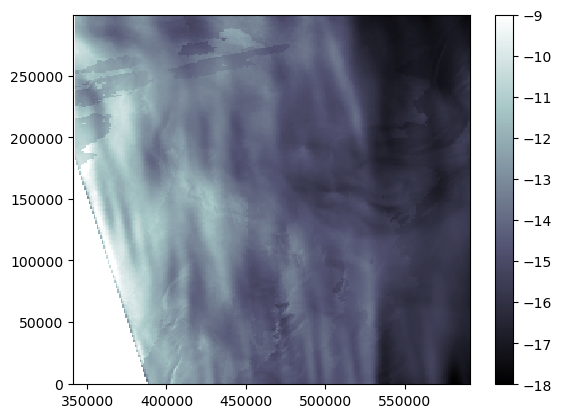

In [64]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(
    nrcs_db.grg,
    nrcs_db.az,
    nrcs_db_nan.sel(sat="S1", pol="M"),
    vmin=-18,
    vmax=-9,
    cmap="bone",
)
fig.colorbar(pcm, ax=ax)

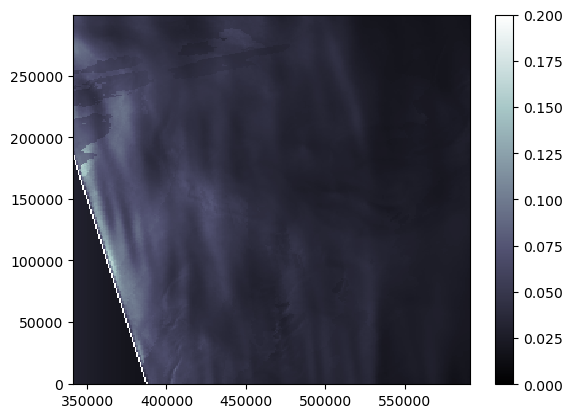

In [13]:
fig, ax = plt.subplots()
pcm = ax.pcolormesh(
    nrcs.grg,
    nrcs.az,
    nrcs.sel(sat="S1", pol="M").nrcs,
    vmin=0,
    vmax=0.2,
    cmap="bone",
)
fig.colorbar(pcm, ax=ax)